In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Note 
*For Label*
- **1 : Safe Site**
- **0 : Unsafe Site**

In [2]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [32]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [24]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == "O":
        obj_col.append(col)

In [25]:
obj_col

['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

In [31]:
df[obj_col]

,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,ข่าวสด ข่าววันนี้ ข่าวกีฬา ข่าวบันเทิง อัพเดทส...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universität mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundación rewilding argentina
...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,www.skincareliving.com,com,skincareliving
235791,77185.txt,https://www.winchester.gov.uk,www.winchester.gov.uk,uk,winchestergov
235792,622132.txt,https://www.nononsensedesign.be,www.nononsensedesign.be,be,nononsensedesign
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,patient-cell-40f5.updatedlogmylogin.workers.dev,dev,patient-cell-40f5updatedlogmyloginworkers


In [39]:
df[df["IsHTTPS"] == 0]

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
11,http://www.teramill.com,22,www.teramill.com,16,0,com,82.644628,1.000000,0.522907,0.067418,...,0,0,0,0,0,0,0,0,1,0
20,http://www.f0519141.xsph.ru,26,www.f0519141.xsph.ru,20,0,ru,55.284926,0.923077,0.018013,0.015061,...,0,0,0,0,0,0,0,0,0,0
21,http://www.shprakserf.gq,24,www.shprakserf.gq,17,0,gq,56.551141,1.000000,0.000053,0.042982,...,0,0,0,0,0,0,0,0,0,0
28,http://www.kuradox92.lima-city.de,32,www.kuradox92.lima-city.de,26,0,de,45.849802,0.526316,0.032650,0.045266,...,0,0,0,1,0,0,1,0,1,0
32,http://att-103731-107123.weeblysite.com/,40,att-103731-107123.weeblysite.com,32,0,com,36.612216,0.607143,0.522907,0.035014,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235759,http://brigdedapps.net,22,brigdedapps.net,15,0,net,66.333333,1.000000,0.038420,0.051107,...,0,0,0,0,0,0,1,0,1,0
235768,http://kratiknamdev.github.io/instagram-login-...,52,kratiknamdev.github.io,22,0,io,32.488522,0.684211,0.012927,0.056982,...,0,0,0,0,0,0,0,0,0,0
235769,http://www.golangapis.com,24,www.golangapis.com,18,0,com,72.517007,1.000000,0.522907,0.061786,...,0,0,0,0,0,0,0,0,0,0
235776,http://www.sm.fbcode.co,22,www.sm.fbcode.co,16,0,co,68.723584,0.777778,0.005977,0.058069,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.drop(["FILENAME", "Title"], axis = 1, inplace= True)

In [40]:
df.drop(["URL", "Domain"], axis = 1, inplace= True)

In [41]:
df["label"].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [44]:
corr_dict = dict(df.corr(numeric_only=True)["label"].sort_values())

In [50]:
pd.DataFrame([corr_dict]).transpose()

,0
SpacialCharRatioInURL,-0.533537
DegitRatioInURL,-0.432032
LetterRatioInURL,-0.367794
NoOfOtherSpecialCharsInURL,-0.358891
DomainLength,-0.283152
NoOfLettersInURL,-0.258090
URLLength,-0.233445
NoOfDegitsInURL,-0.177980
NoOfQMarkInURL,-0.175621
TLDLength,-0.079159


<Axes: xlabel='SpacialCharRatioInURL', ylabel='Count'>

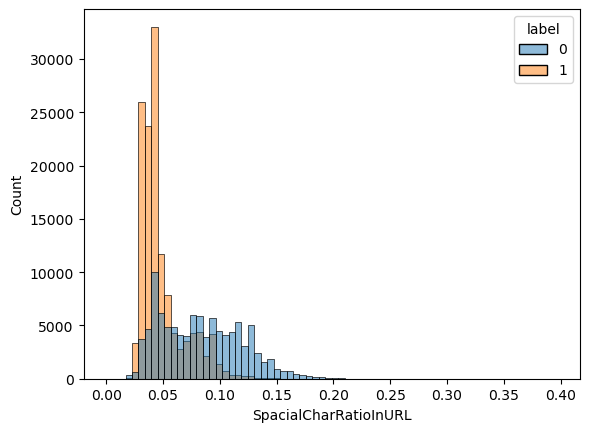

In [59]:
sns.histplot(data=df, x ="SpacialCharRatioInURL", bins= 70, hue= "label")
# the plot shows the more SpacialCharRatioInURL the more is its possiblity to be phishing site

<Axes: xlabel='IsHTTPS', ylabel='count'>

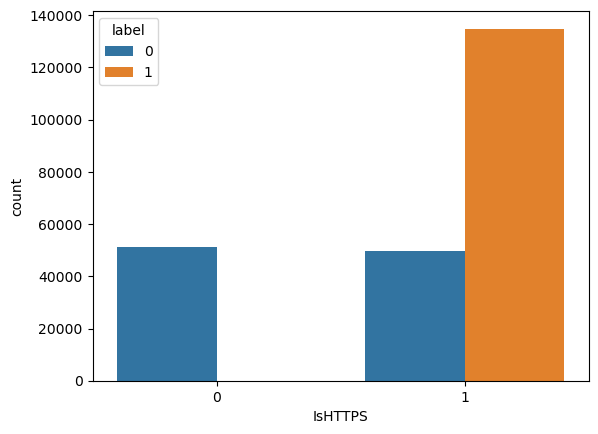

In [60]:
sns.countplot(data=df, x ="IsHTTPS", hue= "label")
# the plot shows that sites without https are all unsafe

<Axes: xlabel='URLSimilarityIndex', ylabel='Count'>

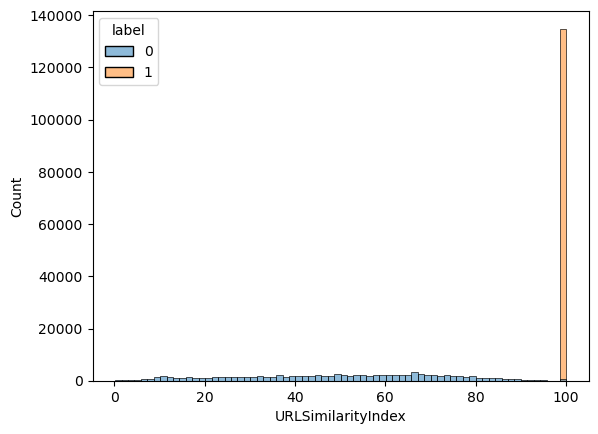

In [61]:
sns.histplot(data=df, x ="URLSimilarityIndex", bins= 70, hue= "label")

<Axes: xlabel='DomainLength', ylabel='Count'>

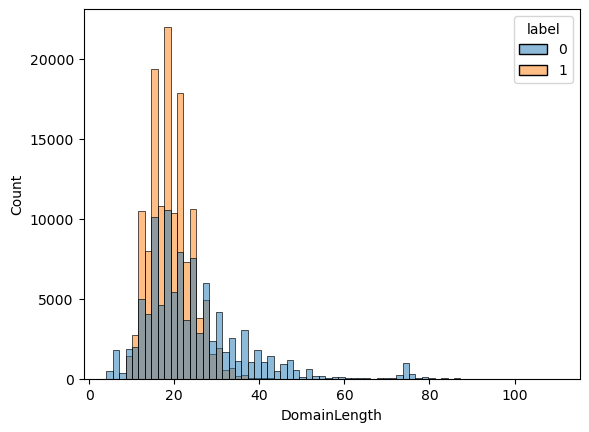

In [62]:
sns.histplot(data=df, x ="DomainLength", bins= 70, hue= "label")

<Axes: >

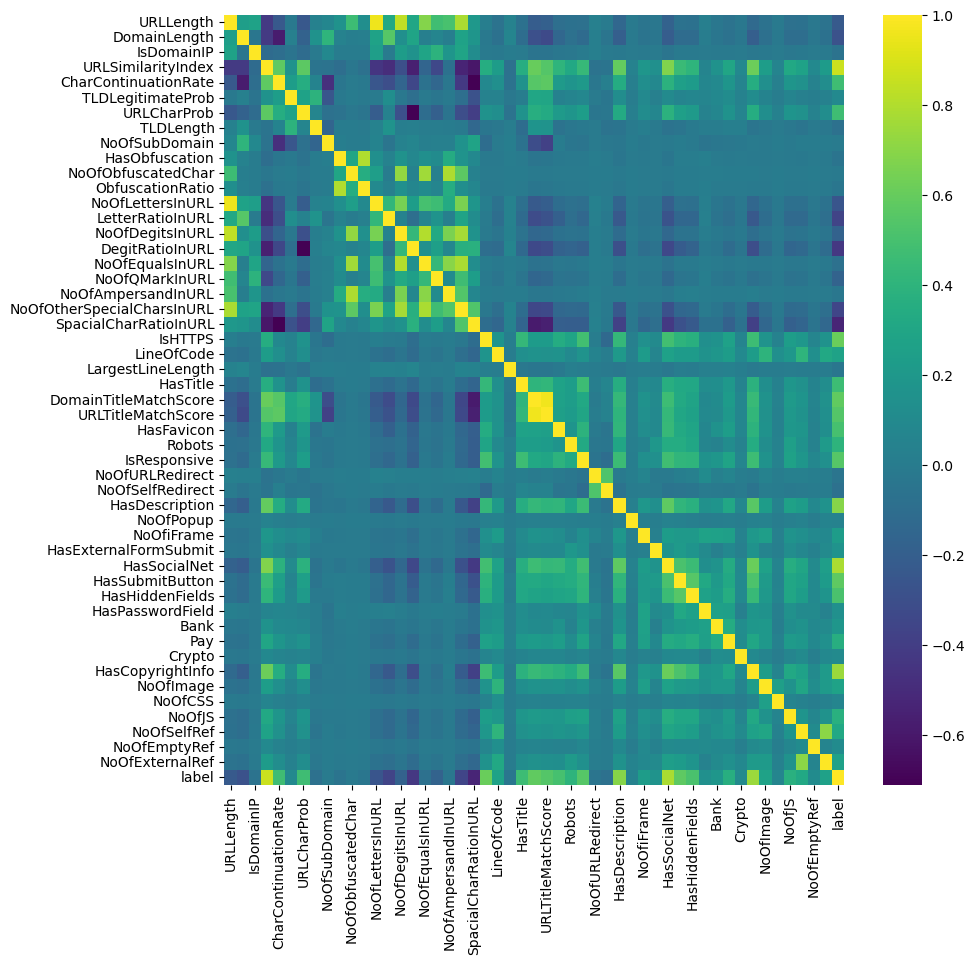

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cmap= "viridis")

In [69]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [70]:
encoder = LabelEncoder()

In [71]:
df["TLD"] = encoder.fit_transform(df["TLD"])

In [73]:
df["TLD"].unique()[:5]

array([231, 254, 647, 503, 368])

In [75]:
for col in df.columns:
    if df[col].dtypes == "O":
        print(col)

In [76]:
X = df.drop("label", axis = 1)
y = df["label"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

In [85]:
X_train.shape

(157982, 51)

In [97]:
model = Sequential()

model.add(InputLayer(shape = (51,)))

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [98]:
model.fit(x=X_train,
         y = y_train,
         epochs=5,
         validation_data=[X_test, y_test])

Epoch 1/5
4937/4937 ━━━━━━━━━━━━━━━━━━━━ 70s 13ms/step - accuracy: 0.9876 - loss: 0.0302 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 2/5
4937/4937 ━━━━━━━━━━━━━━━━━━━━ 57s 12ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9997 - val_loss: 8.7014e-04
Epoch 3/5
4937/4937 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9996 - val_loss: 0.0010
Epoch 4/5
4937/4937 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9997 - val_loss: 7.6160e-04
Epoch 5/5
4937/4937 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0022


In [99]:
model.evaluate(X_test, y_test)

2432/2432 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0020


[0.0022374968975782394, 0.9993959665298462]

In [100]:
predictions = model.predict(X_test)

2432/2432 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [114]:
predictions.shape

(77813, 1)

In [115]:
predictions = np.reshape(predictions.round(), (-1,))

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(confusion_matrix(y_test, predictions))

[[33265    47]
 [    0 44501]]


In [118]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33312
           1       1.00      1.00      1.00     44501

    accuracy                           1.00     77813
   macro avg       1.00      1.00      1.00     77813
weighted avg       1.00      1.00      1.00     77813



In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logistic = LogisticRegression(max_iter=10000)

In [121]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [122]:
logistic.score(X_test, y_test)

0.9997301222160822